#Загрузка данных#

In [3]:
import zipfile   # библиотека для работы с zip
import os        # библиотека для работы с файловой системой

from google.colab import drive   # модуль для работы с диском


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip_file = '/content/drive/My Drive/курсач/archive.zip'

z = zipfile.ZipFile(zip_file,'r')
z.extractall()

In [6]:
print(os.listdir())  # проверка

['.config', 'test', 'drive', 'new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'sample_data']


#Предобработка#

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#Архитектура#

In [12]:
model1 = tf.keras.models.Sequential()

In [13]:
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
model1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
model1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
model1.add(tf.keras.layers.Flatten())

In [18]:
model1.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
#Output Layer
model1.add(tf.keras.layers.Dense(units=38,activation='softmax'))

#Обучение#

In [20]:
model1.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [22]:
training_history = model1.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 166s 72ms/step - loss: 0.8004 - accuracy: 0.7630 - val_loss: 0.3471 - val_accuracy: 0.8891
Epoch 2/10
2197/2197 [==============================] - 128s 58ms/step - loss: 0.2227 - accuracy: 0.9282 - val_loss: 0.2453 - val_accuracy: 0.9200
Epoch 3/10
2197/2197 [==============================] - 122s 55ms/step - loss: 0.1247 - accuracy: 0.9588 - val_loss: 0.1678 - val_accuracy: 0.9490
Epoch 4/10
2197/2197 [==============================] - 129s 59ms/step - loss: 0.0818 - accuracy: 0.9728 - val_loss: 0.2110 - val_accuracy: 0.9360
Epoch 5/10
2197/2197 [==============================] - 121s 55ms/step - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.1698 - val_accuracy: 0.9516
Epoch 6/10
2197/2197 [==============================] - 126s 57ms/step - loss: 0.0504 - accuracy: 0.9835 - val_loss: 0.1509 - val_accuracy: 0.9573
Epoch 7/10
2197/2197 [==============================] - 119s 54ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0

#Визуализация#

In [23]:
training_history.history #история обучения

{'loss': [0.8003519177436829,
  0.22267009317874908,
  0.12470438331365585,
  0.08183957636356354,
  0.06457352638244629,
  0.05039168521761894,
  0.045321229845285416,
  0.0380670391023159,
  0.031973034143447876,
  0.030148236081004143],
 'accuracy': [0.7630414962768555,
  0.9281883239746094,
  0.9588306546211243,
  0.9728288054466248,
  0.978704035282135,
  0.9834839105606079,
  0.9851483106613159,
  0.9873533248901367,
  0.9898712635040283,
  0.9906821250915527],
 'val_loss': [0.3471089005470276,
  0.2453099489212036,
  0.1678398996591568,
  0.21104969084262848,
  0.169830322265625,
  0.1508946716785431,
  0.2567390501499176,
  0.18367290496826172,
  0.16479697823524475,
  0.2093411535024643],
 'val_accuracy': [0.8890849351882935,
  0.919986367225647,
  0.948952853679657,
  0.936034619808197,
  0.9515706896781921,
  0.9573184847831726,
  0.9333598613739014,
  0.950717031955719,
  0.9589118957519531,
  0.9513430595397949]}

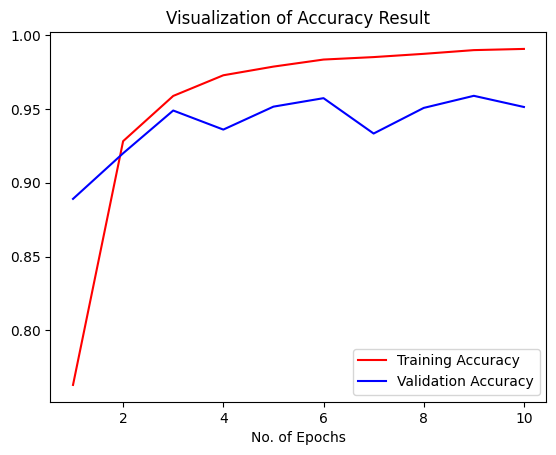

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

#Тестируем


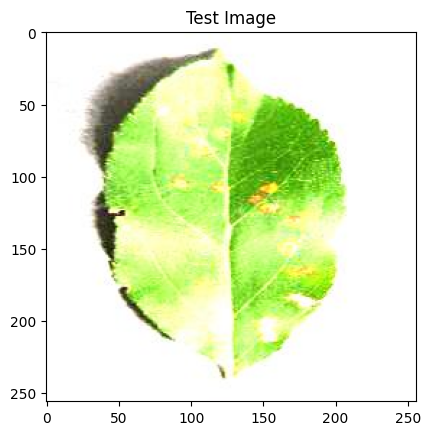

In [25]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.show()

In [26]:
import numpy as np

In [27]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model1.predict(input_arr)

1/1 [==============================] - 1s 662ms/step


In [28]:
print(predictions)

[[8.4294294e-10 7.0332076e-15 9.9896419e-01 5.8478951e-12 1.4348575e-05
  1.7599506e-08 1.3811597e-14 7.9894018e-13 3.0360907e-14 5.9673662e-15
  7.5721278e-12 1.4839743e-10 1.4846715e-13 1.5213034e-13 2.8658662e-12
  1.3003574e-04 6.2061400e-09 3.1923032e-12 5.5404920e-11 5.6338911e-07
  3.4435964e-11 1.2715174e-11 5.8447375e-07 9.5837262e-11 1.8110230e-16
  1.9516467e-12 7.8178332e-11 1.1789595e-11 4.9536163e-04 1.0727595e-10
  3.0232430e-04 1.6103119e-12 2.1233469e-12 1.6931389e-11 2.4692628e-09
  9.2467344e-05 1.2903863e-07 2.3397548e-10]]


In [29]:
result_index = np.argmax(predictions)
print(result_index)

2


In [30]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

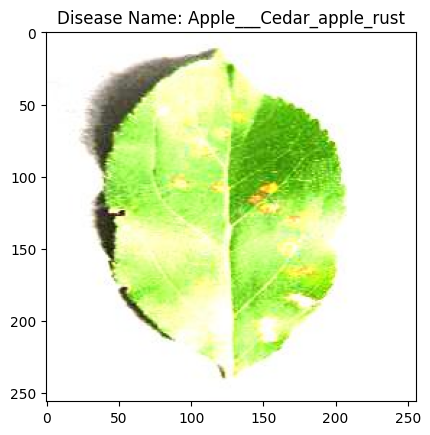

In [31]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.show()